In [ ]:
<<피자 지름과 가격>>
No. 지름(cm)  가격(원)
1   12        7000
2   16        9000
3   20        13000
4   28        17500
5   36        18000

In [18]:
# ex01) 피자의 지름을 사용해서 가격을 예측해보자
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import *
import sklearn as sk
from sklearn.linear_model import LinearRegression

x = [[12],[16],[20],[28],[36]]
y = [[7000],[9000],[13000],[17500],[18000]]
print(X)
print(y)

# 모델 구축
model = LinearRegression()   # 회귀 모델 설정
model.fit(x,y)

# 예측 해보자 25cn 가격이?
price = model.predict(np.array([25]).reshape(-1,1))
price[0][0]
print('25cm pizza should cost : \%d'%price[0][0])

# 모델선택 LinearRegression -> 학습 fit -> 예측 predict()

# 기여울 = 회귀의 평가방법 = 결정계수
# 새로운 데이터 테스트를 생성해서 결정계수. 즉 기여도를 살펴보자
x_test = [[16],[18],[22],[32],[24]]
y_test = [[11000],[8500],[15000],[18000],[11000]]
score = model.score(x_test, y_test)
print("r-squared :", score)

[[12], [16], [20], [28], [36]]
[[7000], [9000], [13000], [17500], [18000]]
25cm pizza should cost : \14169
r-squared : 0.6620052929422551


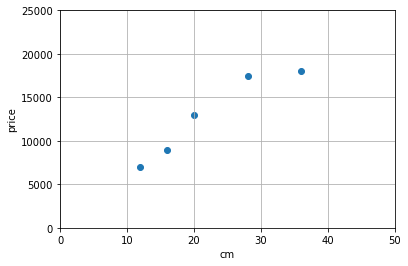

In [17]:
plt.figure()
plt.xlabel('cm')
plt.ylabel('price')
plt.scatter(x,y)
plt.axis([0,50,0,25000])
plt.grid(True)

In [ ]:
<<피자 지름과 가격>>
No. 지름(cm)  토핑수  가격(원)
1   12         2      7000
2   16         1      9000
3   20         0      13000
4   28         2      17500
5   36         0      18000

In [27]:
# ex01) 피자의 지름을 사용해서 가격을 예측해보자
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import *
import sklearn as sk
from sklearn.linear_model import LinearRegression

x = [[12,2],[16,1],[20,0],[28,2],[36,0]]
y = [[7000],[9000],[13000],[17500],[18000]]
print(X)
print(y)

# 모델 구축
model = LinearRegression()   # 회귀 모델 설정
model.fit(x,y)

# 모델선택 LinearRegression -> 학습 fit -> 예측 predict()

# 기여울 = 회귀의 평가방법 = 결정계수
# 새로운 데이터 테스트를 생성해서 결정계수. 즉 기여도를 살펴보자
x_test = [[16,2],[18,0],[22,2],[32,2],[24,0]]
y_test = [[7000],[8500],[15000],[18000],[11000]]

prices = model.predict(x_test)
for i, price in enumerate(prices):
    print('Predict :%s, Target :%s'%(price, y_test[i]))
    
score = model.score(x_test, y_test)    
print("r-squared :", score)

[[12], [16], [20], [28], [36]]
[[7000], [9000], [13000], [17500], [18000]]
Predict :[10062.5], Target :[7000]
Predict :[10281.25], Target :[8500]
Predict :[13093.75], Target :[15000]
Predict :[18145.83333333], Target :[18000]
Predict :[13312.5], Target :[11000]
r-squared : 0.7409318451188569


In [ ]:
2) 평가 지표 값을 살펴보자
 - confusion matrix : 행렬의 두 값을 분류(F,T) 결과를 표로 만들어서 분류작업을 한다.
                        0(negative)     1(positive)
        0(negative)       TN               FP
        1(positive)       FN               TP
    TP 1 1, FP 0 1, FN 1 0, TN 0 0
        
 - Accuracy
 - Precision
 - Recall
 - F-measure

In [32]:
from sklearn.metrics import *
x_test = [0,0,0,0,0,1,1,1,1,1]
y_pred = [0,1,0,0,0,0,0,1,1,1]

cm = confusion_matrix(x_test, y_pred)
print(cm)

tn,fp,fn,tp = confusion_matrix(x_test, y_pred).ravel()
print('TN', tn)
print('FP', fp)
print('FN', fn)
print('TP', tp)

print('정답률')
tn,fp,fn,tp = confusion_matrix(x_test, y_pred).ravel()
print((tp+tn)/(tp+fp+fn+tn))

print('accuracy :', accuracy_score(x_test, y_pred))   # 좋은 모델일까?

[[4 1]
 [2 3]]
TN 4
FP 1
FN 2
TP 3
정답률
0.7
accuracy : 0.7


In [42]:
from sklearn.metrics import *
x_test = [0,0,0,0,0,1,1,1,1,1]
y_pred = [0,1,0,0,0,0,0,1,1,1]

cm = confusion_matrix(x_test, y_pred)
print(cm)

tn,fp,fn,tp = confusion_matrix(x_test, y_pred).ravel()
print('TN', tn)
print('FP', fp)
print('FN', fn)
print('TP', tp, '\n')

print('정답률')
tn,fp,fn,tp = confusion_matrix(x_test, y_pred).ravel()
print((tp+tn)/(tp+fp+fn+tn))
print('accuracy :', accuracy_score(x_test, y_pred), '\n')   # 좋은 모델일까?  정답률은 높을수록 좋은 모델은 아님
# 긍정과 부정의 사례를 균형을 이루어 평가되는 것이 가장 좋은 모델

print('정밀도')
print(tp / (tp+fp))
print('precision :', precision_score(x_test, y_pred), '\n')

print('회수율')
print(tp / (tp+fn))
print('recall', recall_score(x_test, y_pred), '\n')

print('f1_score')
print('f1_score', f1_score(x_test, y_pred), '\n')

print('Classification report')
print(classification_report(x_test, y_pred), '\n')

[[4 1]
 [2 3]]
TN 4
FP 1
FN 2
TP 3 

정답률
0.7
accuracy : 0.7 

정밀도
0.75
precision : 0.75 

회수율
0.6
recall 0.6 

f1_score
f1_score 0.6666666666666665 

Classification report
              precision    recall  f1-score   support

           0       0.67      0.80      0.73         5
           1       0.75      0.60      0.67         5

    accuracy                           0.70        10
   macro avg       0.71      0.70      0.70        10
weighted avg       0.71      0.70      0.70        10
 

